<a href="https://colab.research.google.com/github/Dhruvin3103/ML/blob/main/iris_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Support vector machine Example for verifying the iris plant types

importation

In [200]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [201]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [202]:
iris.DESCR #<-- by using this we come to know about the data as it outputed in a wrong format so used a print command which solved it 
print(""".. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
    :Class Distribution: 33.3% for each of 3 classes.
    :Creator: R.A. Fisher
    :Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
    :Date: July, 1988

The famous Iris database, first used by Sir R.A. Fisher. The dataset is taken
from Fisher's paper. Note that it's the same as in R, but not as in the UCI
Machine Learning Repository, which has two wrong data points.

This is perhaps the best known database to be found in the
pattern recognition literature.  Fisher's paper is a classic in the field and
is referenced frequently to this day.  (See Duda & Hart, for example.)  The
data set contains 3 classes of 50 instances each, where each class refers to a
type of iris plant.  One class is linearly separable from the other 2; the
latter are NOT linearly separable from each other.

.. topic:: References

   - Fisher, R.A. "The use of multiple measurements in taxonomic problems"
     Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to
     Mathematical Statistics" (John Wiley, NY, 1950).
   - Duda, R.O., & Hart, P.E. (1973) Pattern Classification and Scene Analysis.
     (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   - Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
     Structure and Classification Rule for Recognition in Partially Exposed
     Environments".  IEEE Transactions on Pattern Analysis and Machine
     Intelligence, Vol. PAMI-2, No. 1, 67-71.
   - Gates, G.W. (1972) "The Reduced Nearest Neighbor Rule".  IEEE Transactions
     on Information Theory, May 1972, 431-433.
   - See also: 1988 MLC Proceedings, 54-64.  Cheeseman et al"s AUTOCLASS II
     conceptual clustering system finds 3 classes in the data.
   - Many, many more ...""")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

creating the data frame using pandas by providing the data and columns from features name

In [203]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target
df.head(5)
df.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
target                3
dtype: int64

In [204]:
df.tail(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [205]:
iris.target_names
# 0<--setosa
# 1<--versicolor
# 2<--virginica

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

separating the data with respect to flower types

In [206]:
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

In [207]:
df0.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [208]:
df1.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1


In [209]:
df2.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2


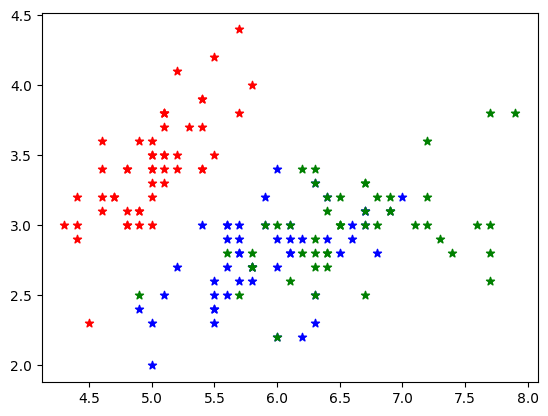

In [210]:
plt.scatter(df0["sepal length (cm)"],df0["sepal width (cm)"],color = "red",marker = "*")
plt.scatter(df1["sepal length (cm)"],df1["sepal width (cm)"],color = "blue",marker = "*")
plt.scatter(df2["sepal length (cm)"],df2["sepal width (cm)"],color = "green",marker = "*")
plt.show()

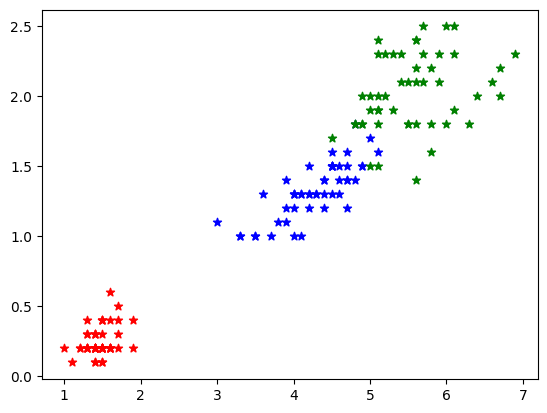

In [211]:
plt.scatter(df0["petal length (cm)"],df0["petal width (cm)"],color = "red",marker = "*")
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],color = "blue",marker = "*")
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"],color = "green",marker = "*")
plt.show()

In [212]:
X = df.drop(["target"],axis =1)
X.head(5)
Y = df['target']
Y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [213]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.8,random_state=1)
# if random state is 0 it gives 100 % accuracy which is good but it is not practical 
# print(X_train,Y_train)
print(X_test.shape)

(30, 4)


In [216]:
from sklearn.svm import SVC
# svm -- > support vector machine
# svc --> support vector classifier
mod = SVC()
mod.fit(X_train,Y_train)


SVC()

In [215]:
mod.score(X_test,Y_test)

0.9666666666666667